In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from matplotlib.collections import LineCollection
import numpy as np


In [2]:
location_data = pd.read_csv('data\location_data.csv')


In [3]:
people_data = pd.read_csv('data\people_data.csv')

In [4]:
security_data = pd.read_csv('data\security_logs.csv')

In [5]:
timedataframe = pd.DataFrame(security_data.Time.value_counts())

In [6]:
class locations():
    def __init__(self, location, locationname):
        self._location = location 
        self._locationname = locationname
        self.peoplepresent = {}
    
    @property
    def location(self):
        return self._location 
    @property
    def locationname(self):
        return self._locationname

    
    def peopleatlocation(self, time):
        return self._peoplepresent[time]
    
    def peopleaddperson(self, time):
        if time in self.peoplepresent:
            self.peoplepresent[time] += 1
        else:
            self.peoplepresent[time] = 1
            
        
    
    
    

In [7]:
time  = security_data['Time'].str.split('-', expand = True)

In [8]:
dataframe = pd.concat([security_data, time], axis = 1)

In [9]:
newdataframe = dataframe.drop('Time', axis = 1)

In [10]:
newdataframe = newdataframe.rename(columns = {0: 'Start', 1: 'End'})

In [11]:
from datetime import datetime, time, date 
def convert_to_datetime(visit):
    # visit type: studentID, name, location, start, end
    start = visit["Start"].strip()
    time_hour = int(start[0:2])
    time_minutes = int(start[2:4])
    start = datetime(2022, 10, 10, time_hour, time_minutes)
    visit["Start"] = start

    end = visit["End"].strip()
    time_hour = int(end[0:2])
    time_minutes = int(end[2:4])
    end = datetime(2022, 10, 10, time_hour, time_minutes)

    if end < start:
        end = datetime(2022, 10, 11, time_hour, time_minutes)
    visit["End"] = end

    return visit

In [13]:
newdataframe =  newdataframe.apply(convert_to_datetime, axis=1)

In [15]:
susnames = ['Beth Jones', 'Oscar Brown', 'Shaun Yates', 'Abdul Murphy']

# checking entery and exit for a single room

In [26]:
sta = newdataframe[newdataframe['Location']== 'St Andrews Building']

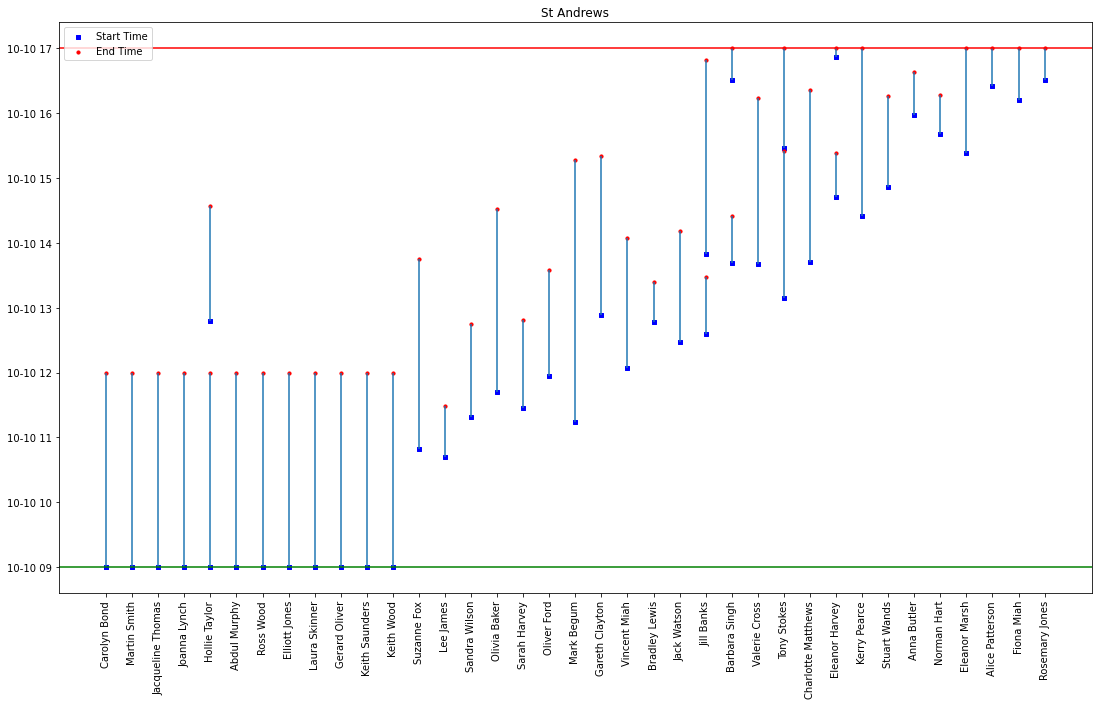

In [35]:
fig  = plt.figure()
fig.set_size_inches(18.5, 10.5)    
ax1 = fig.add_subplot(111)
ax1.scatter(sta['Name'], sta['Start'], s=10, c='b', marker="s", label='Start Time')
ax1.scatter(sta['Name'],sta['End'], s=10, c='r', marker="o", label='End Time')
ax1.axhline(y=datetime(2022,10,10,9), color='g', linestyle='-')
ax1.axhline(y=datetime(2022,10,10,17), color='r', linestyle='-')
ax1.vlines(sta['Name'], sta['Start'], sta['End'])
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper left')
plt.title('St Andrews')
plt.show()

In [30]:
def graphoverlaps(location, opening, closing):
    place = newdataframe[newdataframe['Location']== location]
    fig  = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    ax1.scatter(place['Name'], place['Start'], s=10, c='b', marker="s", label='Entry Time')
    ax1.scatter(place['Name'],place['End'], s=10, c='r', marker="o", label='Exit Time')
    ax1.vlines(place['Name'], place['Start'], place['End'])
    ax1.axhline(y=opening, color='g', linestyle='-', label = 'Opening Time')
    ax1.axhline(y=closing, color='r', linestyle='-', label = 'Closing Time')
    plt.xticks(rotation = 'vertical')
    plt.legend(loc='upper left')
    plt.title(location)
    plt.show()

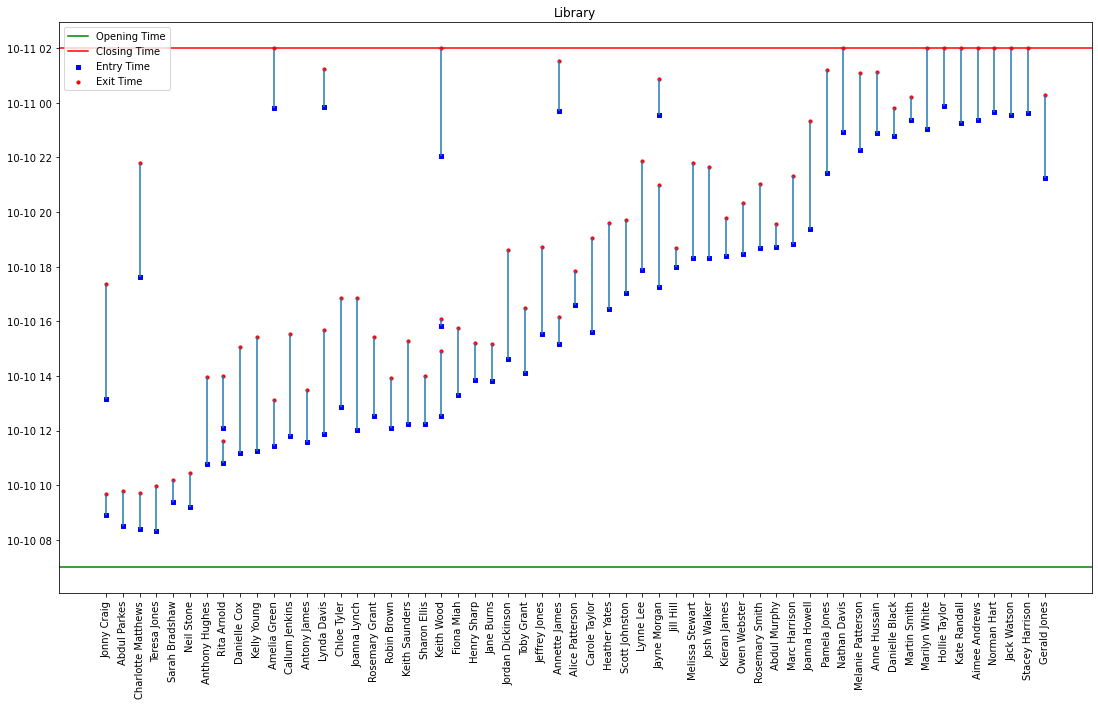

In [37]:
graphoverlaps('Library', datetime(2022,10,10,7), datetime(2022,10,11,2))

In [38]:
dataframe[dataframe['Name']== 'Lee James']

,Student ID,Name,Location,Time,0,1
158,2522391J,Lee James,St Andrews Building,1042-1129,1042,1129
237,2522391J,Lee James,Kelvingrove Park,1151-1233,1151,1233
350,2522391J,Lee James,Wolfson Medical Building,1300-1500,1300,1500
482,2522391J,Lee James,Wolfson Medical Building,1658-1700,1658,1700
626,2522391J,Lee James,Queen Margaret Union,2235-2300,2235,2300


# Graphs for everyroom 

In [314]:
def create_figure(location, opening, closing):
    place = newdataframe[newdataframe['Location']== location]
    fig  = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    ax1.scatter(place['Name'], place['Start'], s=10, c='b', marker="s", label='Entry Time')
    ax1.scatter(place['Name'],place['End'], s=10, c='r', marker="o", label='Exit Time')
    
    xmax = len(list(newdataframe[newdataframe['Location']== location].Name))-1
    ax1.vlines(place['Name'], place['Start'], place['End'])
    ax1.hlines(opening, 0, xmax, color='g', linestyle='-', label = 'Opening Time')
    ax1.hlines(closing, 0, xmax, color='r', linestyle='-', label = 'Closing Time')
    plt.xticks(rotation = 'vertical')
    plt.legend(loc='upper left')
    plt.title("visits to " + location) 
    filename = location.replace(" ", "_").lower()
    with open(f"buildinggraphs/{filename}.html", "w") as f:
            test = mpld3.fig_to_html(plt.gcf())
            f.write(test)
    

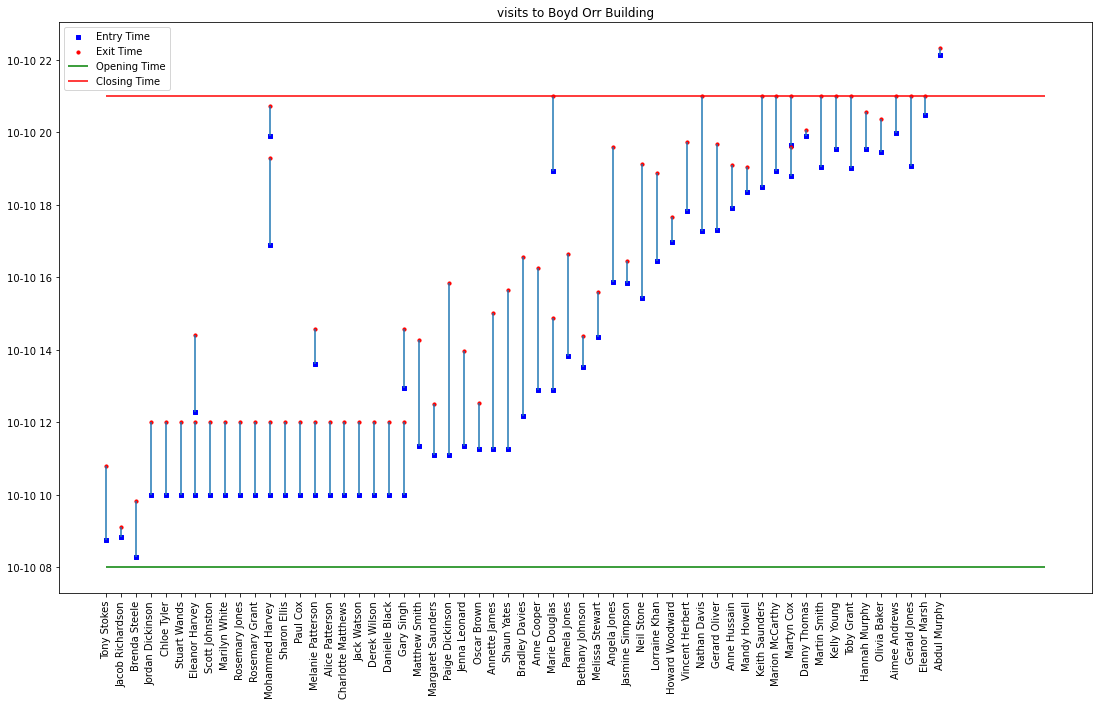

In [299]:
create_figure('Boyd Orr Building', datetime(2022,10,10,8), datetime(2022,10,10,21))

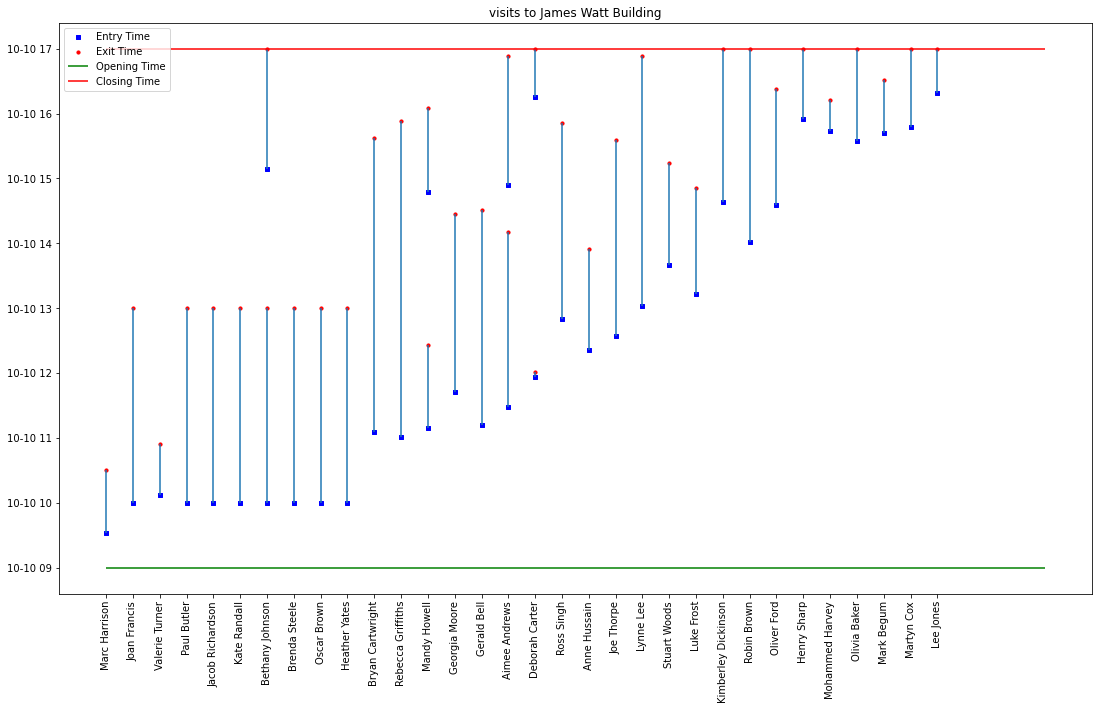

In [300]:
create_figure('James Watt Building', datetime(2022,10,10,9), datetime(2022,10,10,17))

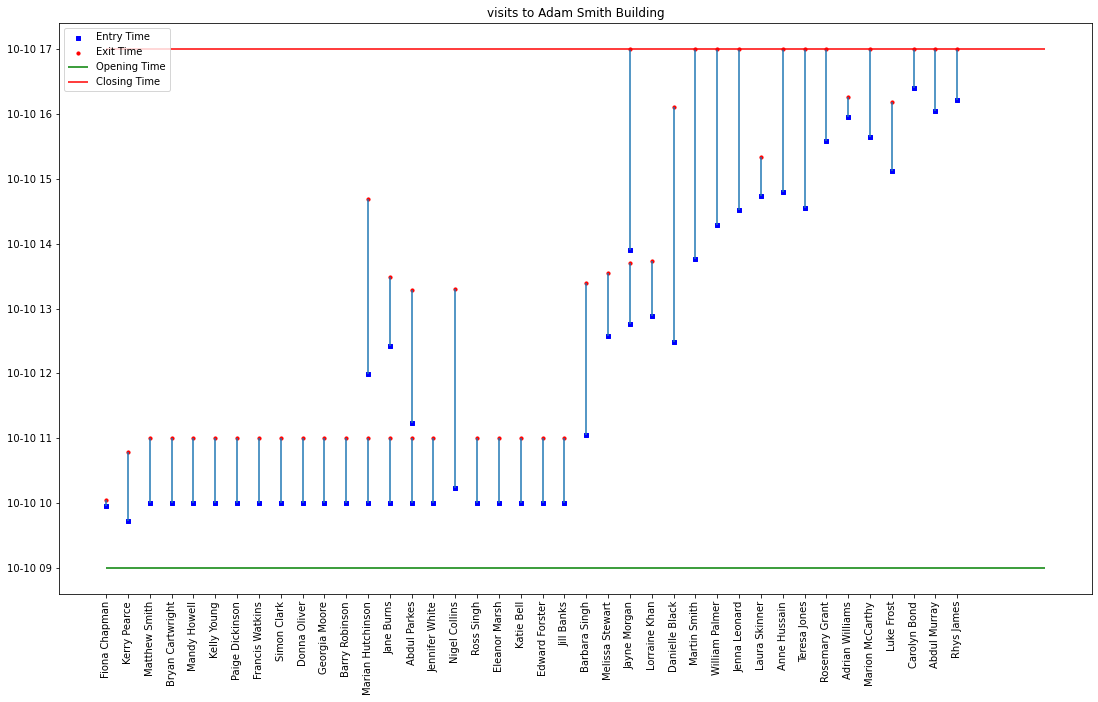

In [301]:
create_figure('Adam Smith Building', datetime(2022,10,10,9), datetime(2022,10,10,17))

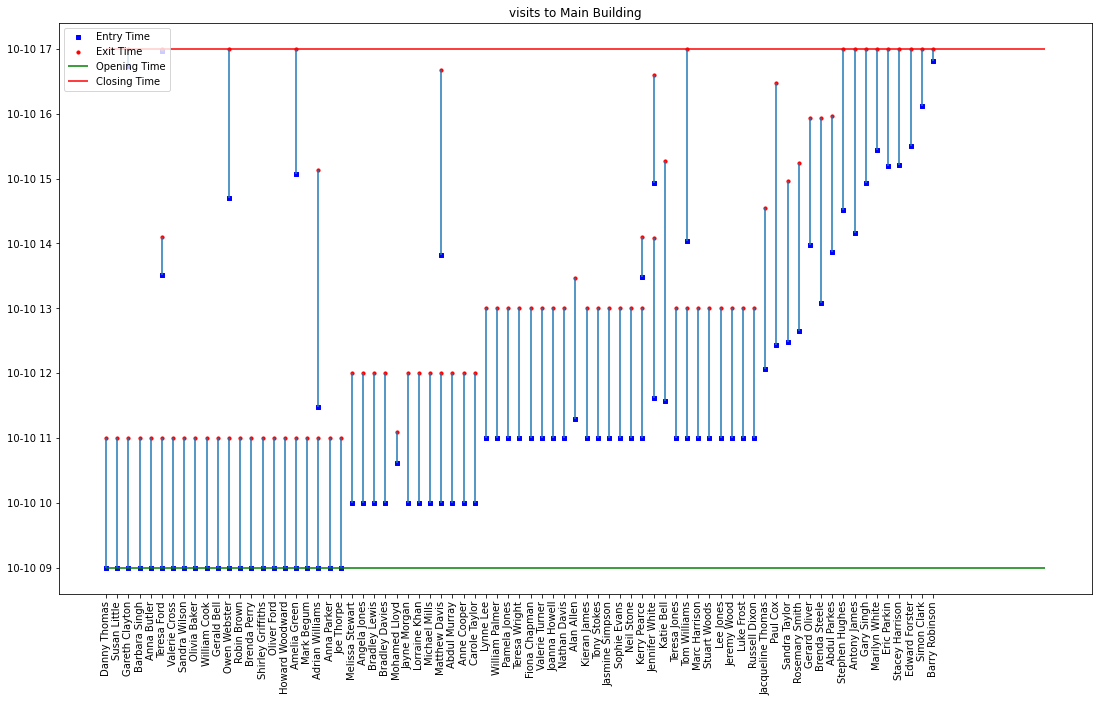

In [302]:
create_figure('Main Building', datetime(2022,10,10,9), datetime(2022,10,10,17))


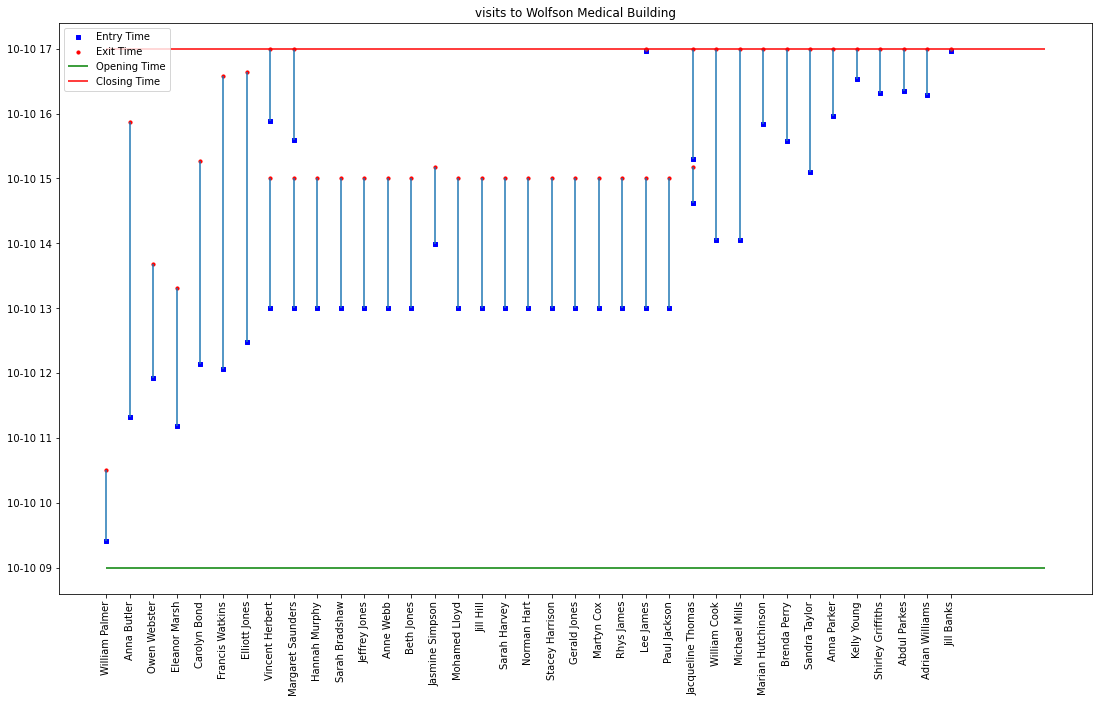

In [303]:
create_figure('Wolfson Medical Building', datetime(2022,10,10,9), datetime(2022,10,10,17))


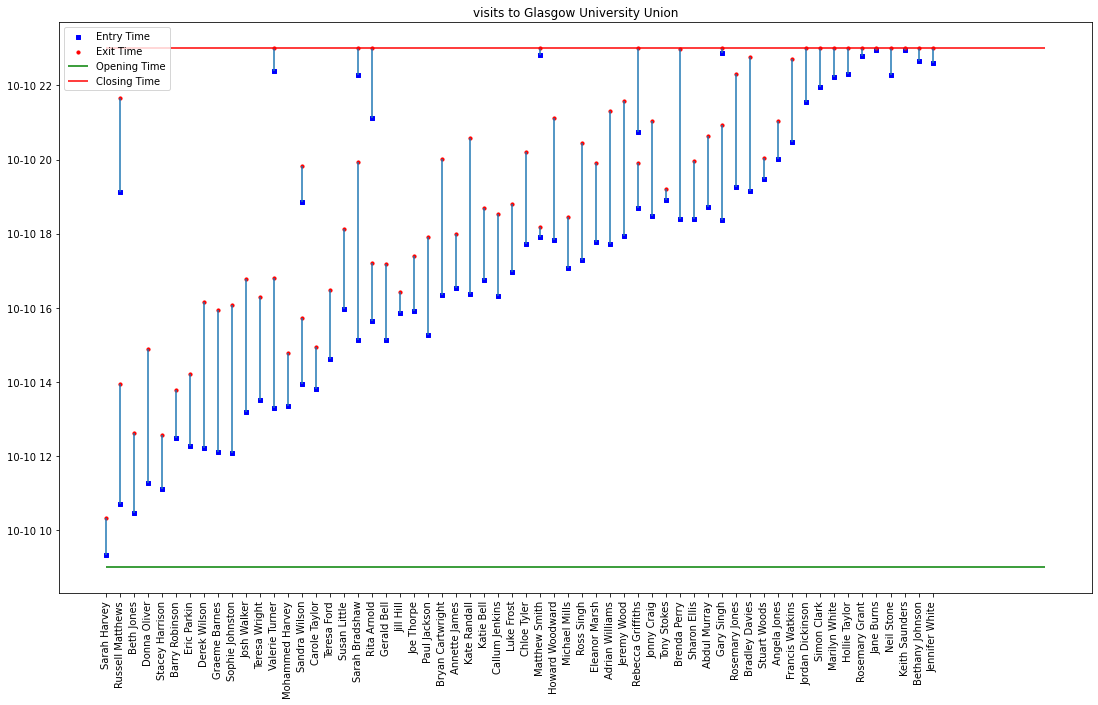

In [304]:
create_figure('Glasgow University Union', datetime(2022,10,10,9), datetime(2022,10,10,23))


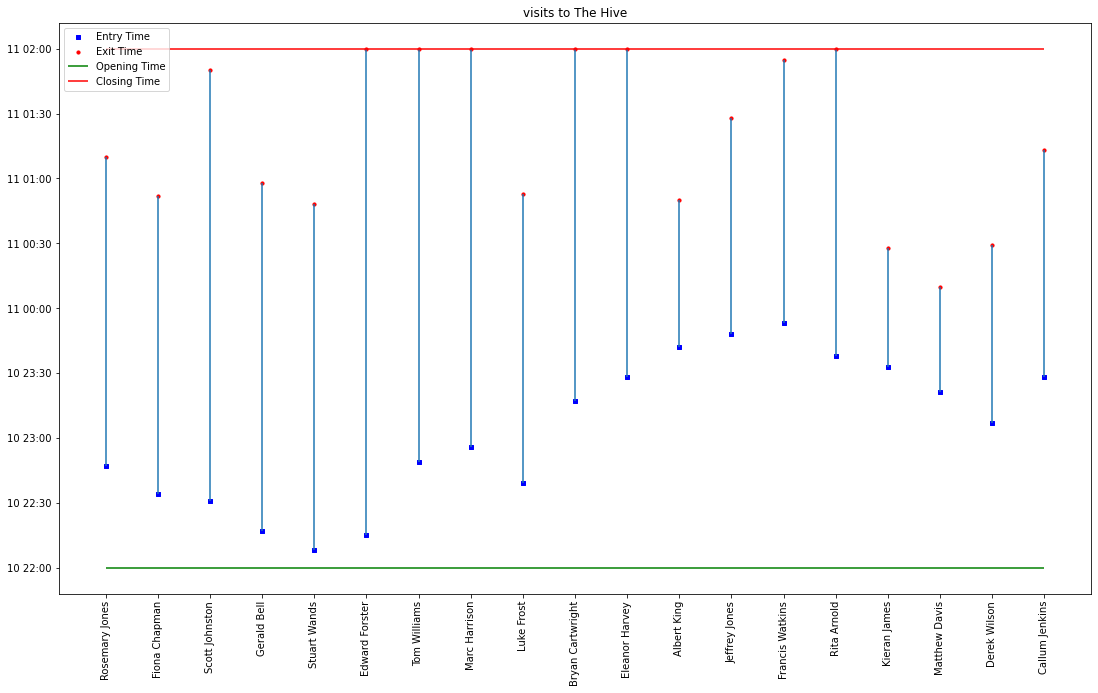

In [305]:
create_figure('The Hive', datetime(2022,10,10,22), datetime(2022,10,11,2))


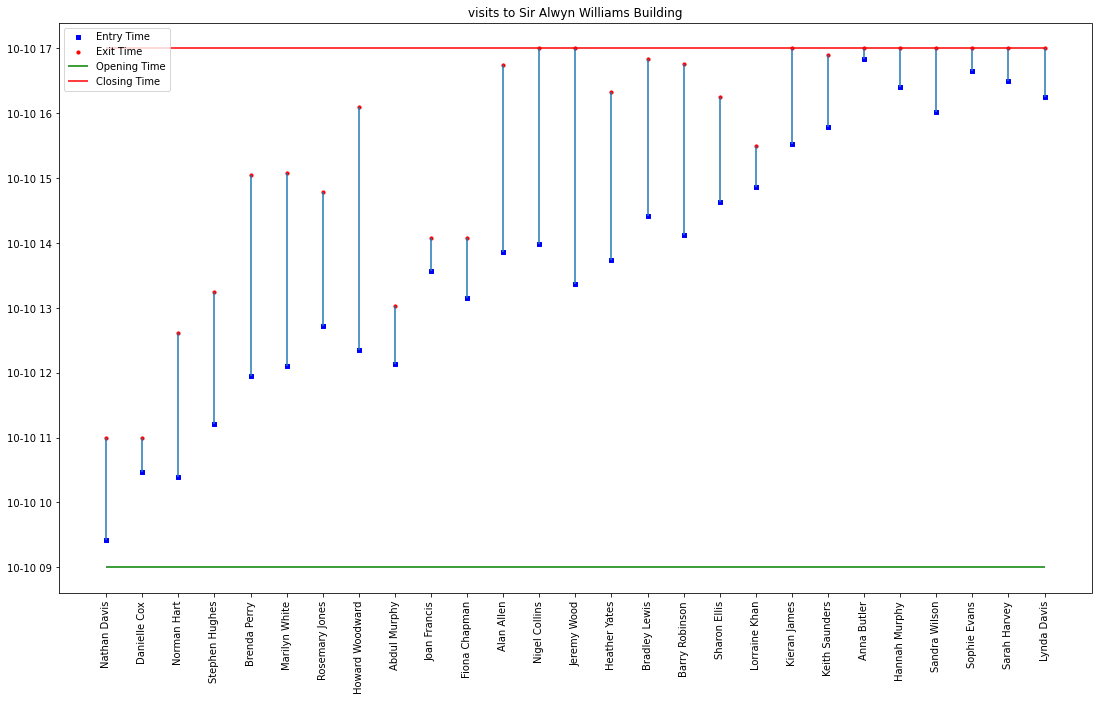

In [306]:
create_figure('Sir Alwyn Williams Building', datetime(2022,10,10,9), datetime(2022,10,10,17))


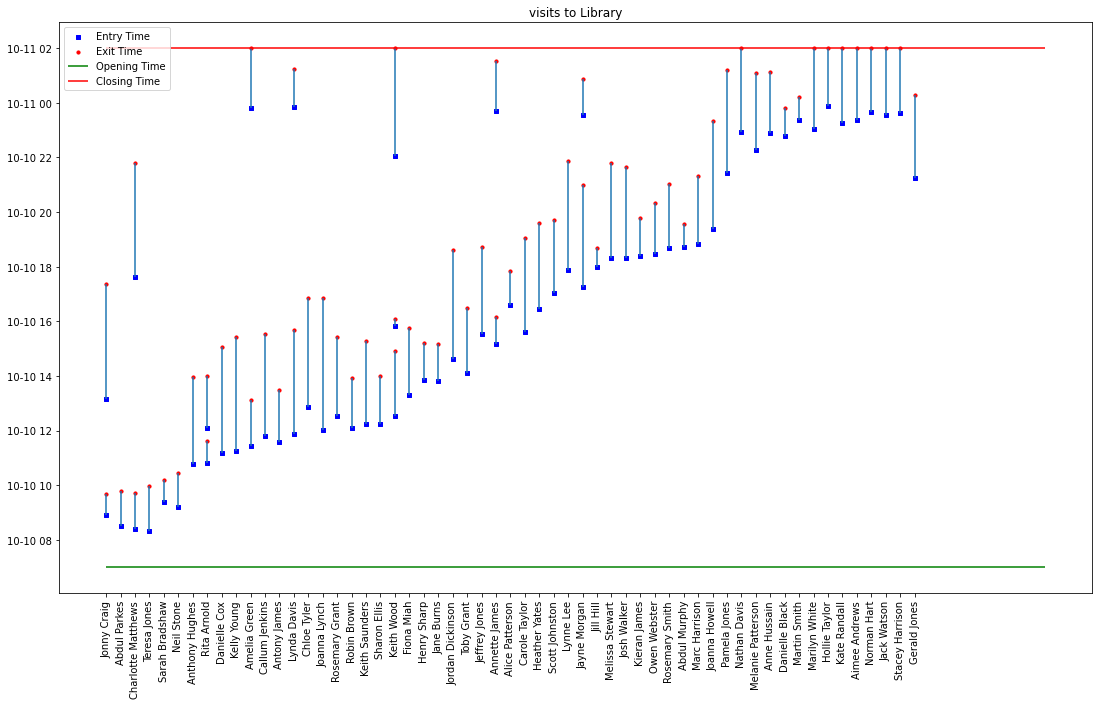

In [307]:
create_figure('Library', datetime(2022,10,10,7), datetime(2022,10,11,2))

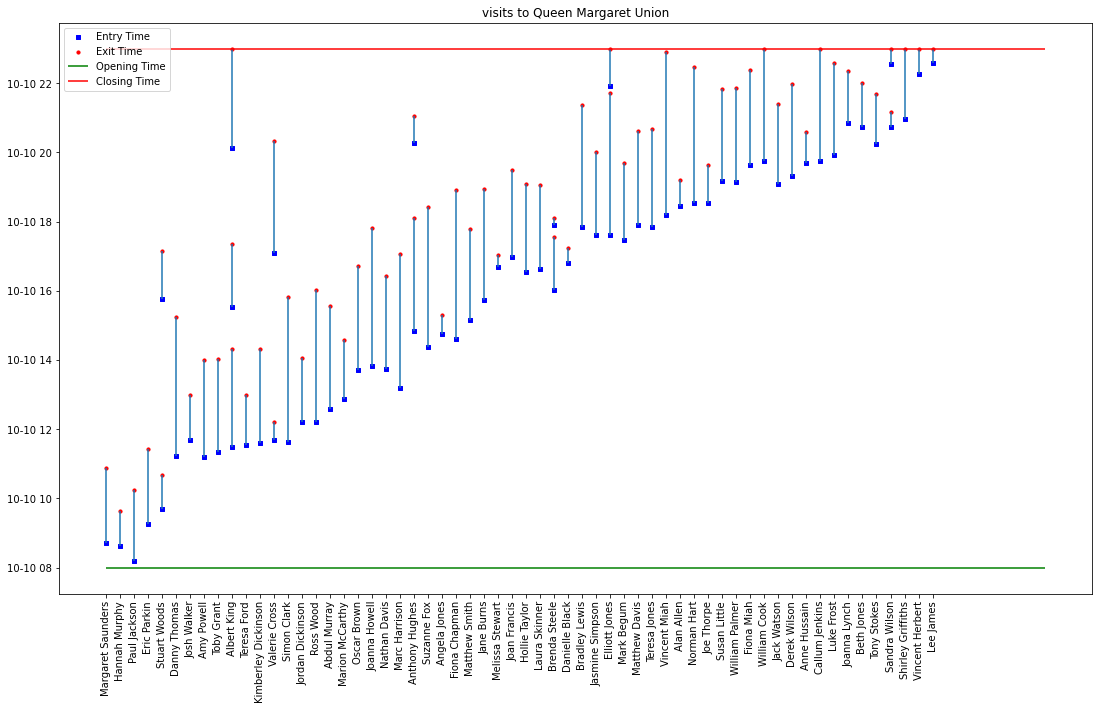

In [308]:
create_figure('Queen Margaret Union', datetime(2022,10,10,8), datetime(2022,10,10,23))


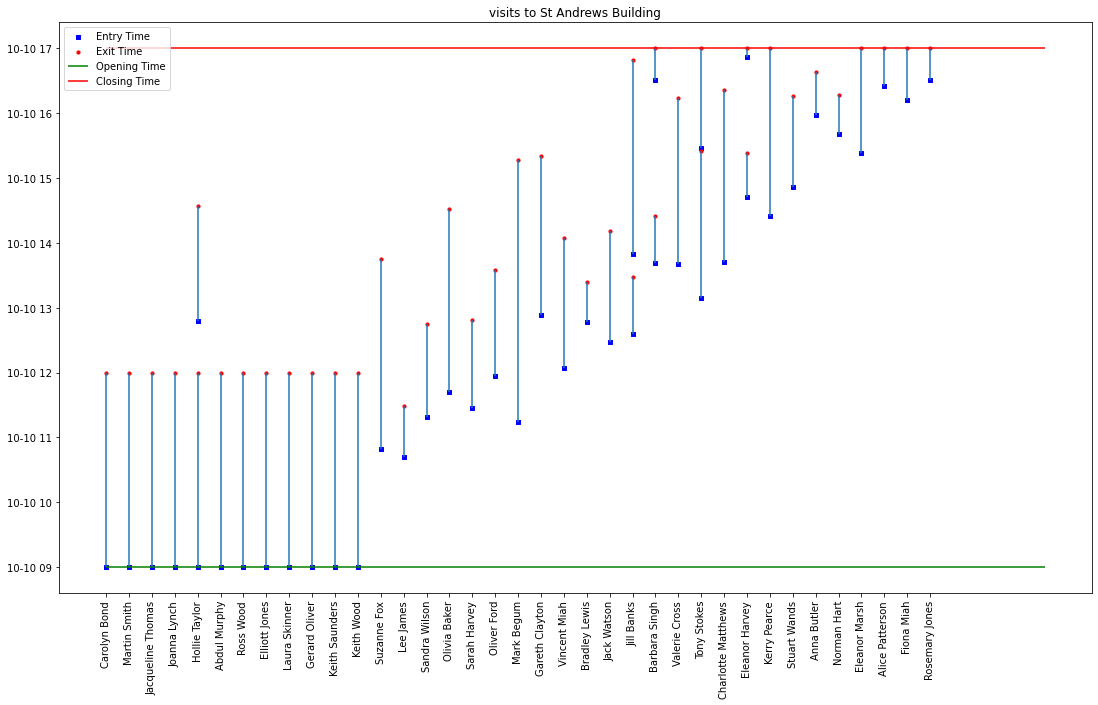

In [309]:
create_figure('St Andrews Building', datetime(2022,10,10,9), datetime(2022,10,10,17))

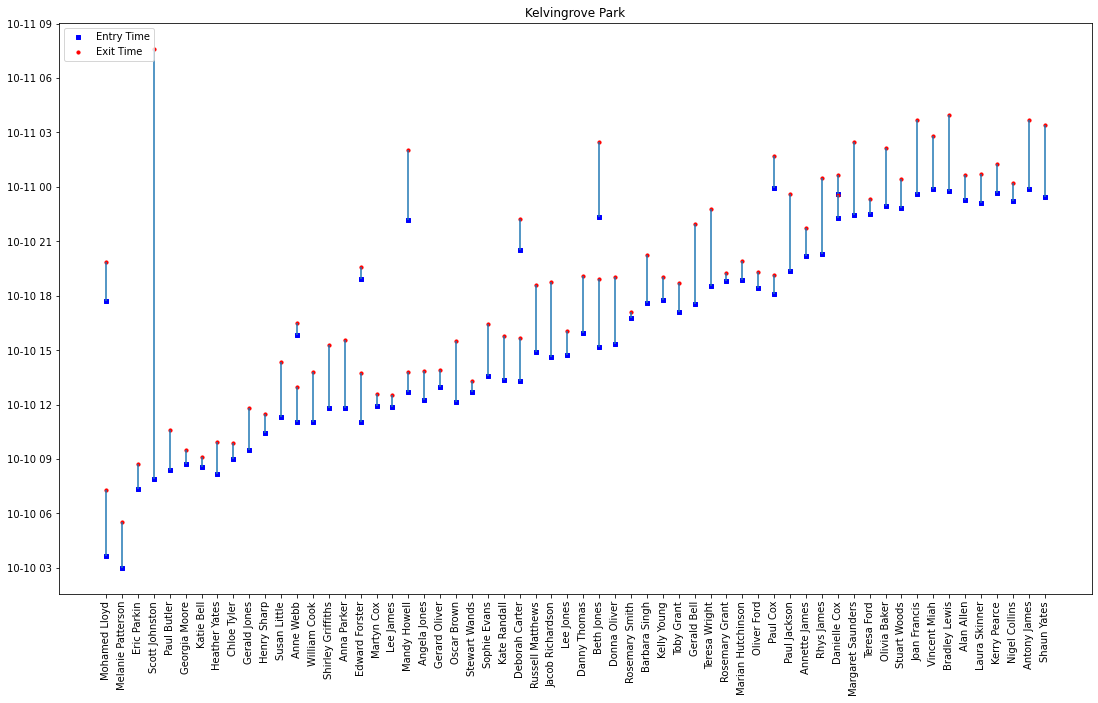

In [310]:
place = newdataframe[newdataframe['Location']== 'Kelvingrove Park']
fig  = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(111)
ax1.scatter(place['Name'], place['Start'], s=10, c='b', marker="s", label='Entry Time')
ax1.scatter(place['Name'],place['End'], s=10, c='r', marker="o", label='Exit Time')
ax1.vlines(place['Name'], place['Start'], place['End'])
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper left')
plt.title('Kelvingrove Park')

with open("buildinggraphs/Kelvingrove Park.html", "w") as f:
        test = mpld3.fig_to_html(plt.gcf())
        f.write(test)

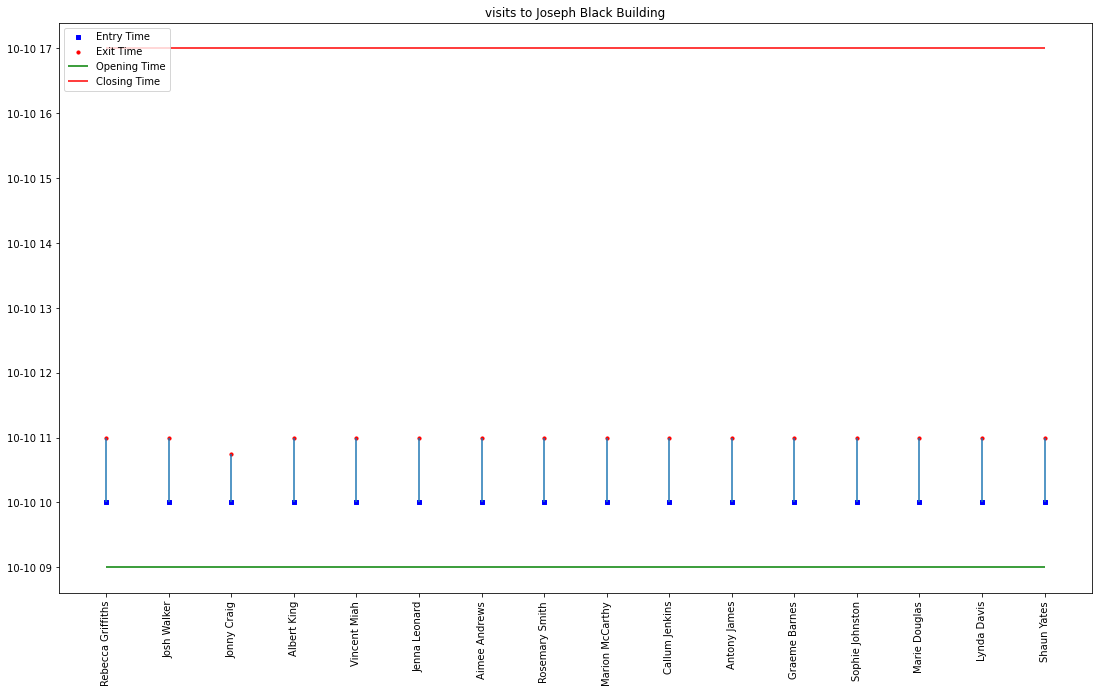

In [315]:
create_figure('Joseph Black Building', datetime(2022,10,10,9), datetime(2022,10,10,17))

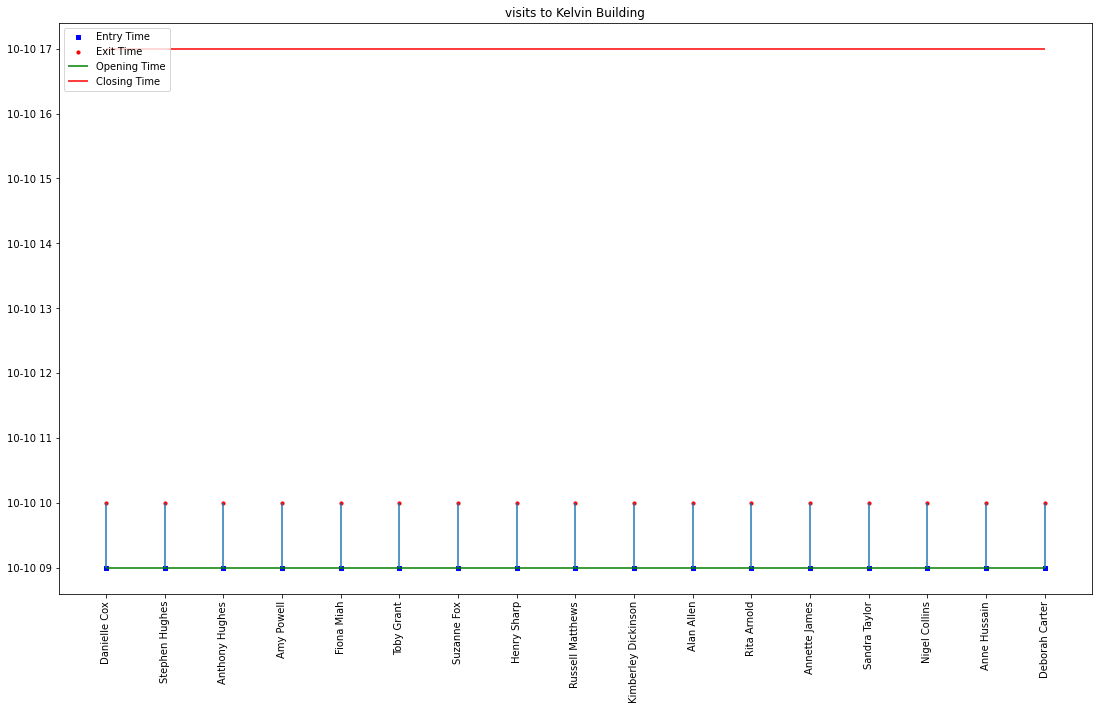

In [318]:
create_figure('Kelvin Building', datetime(2022,10,10,9), datetime(2022,10,10,17))

# Get overlapping times

In [ ]:
def checkforoverlaps(name, dataframe):
    overlaps = 0
    dataframeforname = dataframe[newdataframe['Name']== name]
    numoverlaps = list(dataframeforname['End'].shift() > dataframeforname['Start'])
    for value in numoverlaps:
        if value == True:
            overlaps +=1 
    return overlaps

In [59]:
names  = list(newdataframe.Name.unique())
counts = {}
for name in names:
    tempcount = checkforoverlaps(name, newdataframe)
    if tempcount >= 1:
        counts[name] = tempcount
    

In [60]:
counts

{'Scott Johnston': 1, 'Paul Butler': 1, 'Alice Patterson': 1, 'Oscar Brown': 3}

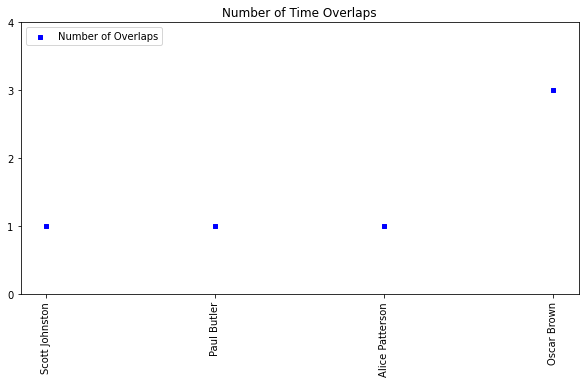

In [61]:
fig  = plt.figure()
fig.set_size_inches(10, 5)    
ax1 = fig.add_subplot(111)
ax1.scatter(counts.keys(), counts.values(), s=10, c='b', marker="s", label='Number of Overlaps')
plt.xticks(rotation = 'vertical')
ax1.yaxis.set_ticks(np.arange(0, 5, 1))
plt.legend(loc='upper left')
plt.title('Number of Time Overlaps')
plt.show()

## Graph time and place per suspisious person

In [63]:
dataframe[dataframe['Name']== 'Scott Johnston']

,Student ID,Name,Location,Time,0,1
3,2453876J,Scott Johnston,Kelvingrove Park,0755-0737,0755,0737
95,2453876J,Scott Johnston,Boyd Orr Building,1000-1200,1000,1200
489,2453876J,Scott Johnston,Library,1703-1943,1703,1943
602,2453876J,Scott Johnston,The Hive,2231-0150,2231,0150


In [206]:
def personalgraph(name):
    place = newdataframe[newdataframe['Name']== name]
    fig  = plt.figure()
    fig.set_size_inches(10, 5)
    ax1 = fig.add_subplot(111)
    ax1.scatter(place['Location'], place['Start'], s=10, c='b', marker="s", label='Entry Time')
    ax1.scatter(place['Location'],place['End'], s=10, c='r', marker="o", label='Exit Time')
    ax1.vlines(place['Location'], place['Start'], place['End'])
    plt.xticks(rotation = 'vertical')
    plt.legend(loc='upper left')
    plt.title(name)
    filename = name.replace(" ", "_").lower()
    with open(f"personaldata/{filename}.html", "w") as f:
            test = mpld3.fig_to_html(plt.gcf())
            f.write(test)
    
    


In [209]:
%%capture
names  = list(newdataframe.Name.unique())
for name in names:
    personalgraph(name)

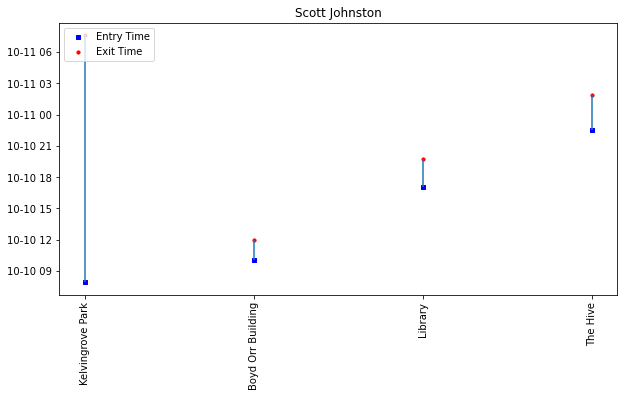

In [317]:
personalgraph('Scott Johnstonz')